this is the code for the k353 semester project. this entire class was in R, but I am doing this final project in python as a refresher of what I learned in this course and as a way to practice python skills. 

part 1: exploratory data analysis, missing values, best numerical and categorical predictors for average fare.

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')
pd.set_option('display.precision',3)

air = pd.read_csv(r"Airfares (1).csv")
air.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Albuquerque NM,*,Dallas/Fort Worth TX,1.02,3.0,No,1.0,5222.30,22089.0,28637.0,668159.0,3.037e+06,0.0,Free,573.0,10941.0,84.46
1,*,Albuquerque NM,*,Las Vegas NV,1.08,0.0,Yes,1.0,7641.73,22089.0,24575.0,668159.0,1.197e+06,0.0,Free,479.0,7170.0,72.43
2,*,Albuquerque NM,*,Los Angeles CA,1.09,3.0,No,1.0,4935.72,22089.0,24706.0,668159.0,9.056e+06,0.0,Free,673.0,11980.0,76.79
3,*,Albuquerque NM,EWR,New York/Newark NY,1.92,3.0,No,0.0,1940.17,22089.0,32991.0,668159.0,8.621e+06,0.0,Constrained,1822.0,4002.0,208.79
4,*,Albuquerque NM,JFK,New York/Newark NY,1.92,3.0,No,0.0,1940.17,22089.0,32991.0,668159.0,8.621e+06,1.0,Free,1822.0,4002.0,208.79


In [6]:
air.shape

(640, 18)

In [10]:
air.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [11]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    639 non-null    object 
 1   S_CITY    639 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    float64
 6   VACATION  638 non-null    object 
 7   SW        639 non-null    float64
 8   HI        638 non-null    float64
 9   S_INCOME  639 non-null    float64
 10  E_INCOME  639 non-null    float64
 11  S_POP     639 non-null    float64
 12  E_POP     639 non-null    float64
 13  SLOT      638 non-null    float64
 14  GATE      638 non-null    object 
 15  DISTANCE  631 non-null    float64
 16  PAX       639 non-null    float64
 17  FARE      638 non-null    float64
dtypes: float64(12), object(6)
memory usage: 90.1+ KB


In [15]:
air.describe(include='all')

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
count,639,639,638,638,638.000,638.000,638,639.000,638.000,639.000,639.000,6.390e+02,6.390e+02,638.000,638,631.000,639.000,638.000
unique,8,51,8,68,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,*,Chicago IL,*,New York/Newark NY,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Free,NaN,NaN,NaN
freq,455,90,501,75,NaN,NaN,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,514,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.202,2.754,NaN,0.304,4442.141,27752.451,27660.848,4.554e+06,3.193e+06,0.285,NaN,981.669,13500.083,160.877
std,NaN,NaN,NaN,NaN,0.204,0.760,NaN,0.460,1724.267,3598.267,4608.284,3.009e+06,2.734e+06,0.452,NaN,646.622,22434.896,76.022
min,NaN,NaN,NaN,NaN,1.000,0.000,NaN,0.000,1230.480,14600.000,14600.000,2.984e+04,1.117e+05,0.000,NaN,114.000,1504.000,42.470
25%,NaN,NaN,NaN,NaN,1.040,3.000,NaN,0.000,3090.137,24706.000,23903.000,1.862e+06,1.229e+06,0.000,NaN,457.000,5345.000,106.290
50%,NaN,NaN,NaN,NaN,1.150,3.000,NaN,0.000,4208.185,28637.000,26409.000,3.533e+06,2.195e+06,0.000,NaN,854.000,7796.000,144.600
75%,NaN,NaN,NaN,NaN,1.298,3.000,NaN,1.000,5480.575,29549.000,31981.000,7.830e+06,4.550e+06,1.000,NaN,1330.500,14241.000,209.350


In [28]:
print(air['VACATION'].value_counts(normalize=True, dropna=False))
print(air['GATE'].value_counts(normalize=True, dropna=False))

No     0.731
Yes    0.266
NaN    0.003
Name: VACATION, dtype: float64
Free           0.803
Constrained    0.194
NaN            0.003
Name: GATE, dtype: float64


In [39]:
missing_rows = air.isna().any(axis=1)
air[missing_rows].shape[0]

9

9 rows missing

In [34]:
air[missing_rows]

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
452,EWR,New York/Newark NY,*,Baltimore/Wash Intl MD,1.00,3.0,No,0.0,2626.90,32991.0,29838.0,8.621e+06,7.146e+06,0.0,Constrained,NaN,7171.0,117.23
475,LGA,New York/Newark NY,*,Milwaukee WI,1.29,3.0,No,0.0,6108.57,32991.0,26695.0,8.621e+06,1.646e+06,1.0,Free,NaN,6590.0,190.09
476,EWR,New York/Newark NY,*,Nashville TN,1.26,3.0,No,0.0,3647.27,32991.0,25995.0,8.621e+06,1.115e+06,0.0,Constrained,NaN,7387.0,215.01
477,JFK,New York/Newark NY,*,Nashville TN,1.26,3.0,No,0.0,3647.27,32991.0,25995.0,8.621e+06,1.115e+06,1.0,Free,NaN,7387.0,215.01
525,EWR,New York/Newark NY,*,Syracuse NY,1.00,3.0,No,0.0,2806.92,32991.0,22069.0,8.621e+06,7.436e+05,0.0,Constrained,NaN,5275.0,120.84
526,JFK,New York/Newark NY,*,Syracuse NY,1.00,3.0,No,0.0,2806.92,32991.0,22069.0,8.621e+06,7.436e+05,1.0,Free,NaN,5275.0,120.84
527,LGA,New York/Newark NY,*,Syracuse NY,1.00,3.0,No,0.0,2806.92,32991.0,22069.0,8.621e+06,7.436e+05,1.0,Free,NaN,5275.0,120.84
586,*,Phoenix AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23025.0,25824.0,2.753e+06,2.550e+06,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471500.0,NaN


missing distance : all <br />
missing essentially every: 586, 611 <br />
action items: drop 586, 611. We could use mean interpolation but the distance between two airports to readily accessible information so I will input manually. <br />
calculating using vincenty's formula with online calculator

452: dist = 169 <br />
475: dist = 738 <br />
476: dist = 748 <br />
477: dist = 765 <br />
525: dist = 195 <br />
526: dist = 208 <br />
527: dist = 197 <br />
586,611: drop 

In [49]:
# air.loc[452,'DISTANCE'] = 169
# air.loc[475,'DISTANCE'] = 738
# air.loc[476,'DISTANCE'] = 748
# air.loc[477,'DISTANCE'] = 765
# air.loc[525,'DISTANCE'] = 195
# air.loc[526,'DISTANCE'] = 208
# air.loc[527,'DISTANCE'] = 197
# air = air.drop([586,611])

# the other way to do is to look @ other cities NYC --> same location and use that number 


In [57]:
air.isna().mean()

S_CODE      0.0
S_CITY      0.0
E_CODE      0.0
E_CITY      0.0
COUPON      0.0
NEW         0.0
VACATION    0.0
SW          0.0
HI          0.0
S_INCOME    0.0
E_INCOME    0.0
S_POP       0.0
E_POP       0.0
SLOT        0.0
GATE        0.0
DISTANCE    0.0
PAX         0.0
FARE        0.0
dtype: float64

we now have no missing data

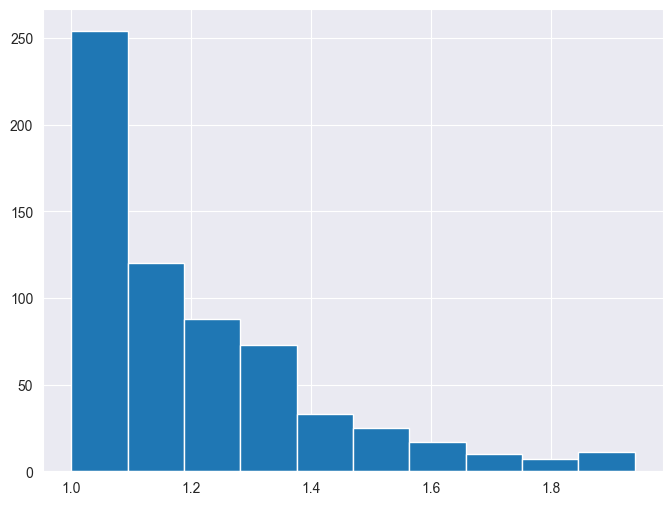

In [59]:
plt.hist(air['COUPON'])
plt.show()